# Workshop 2c: Naïve Bayes Classifier v2

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

This is the same example of Workshop2b, but we work with a dataset organized in a different way. Audio files have a random-looking name. The association between filename and label (type of acoustic instrument) is provided in a csv file (somma separated values). At first we import the csv file file in a Pandas data structure. The we iterate on the entries (or rows) of the data structure to load files (one at a time), and create both arays containing features and label. Then we proceed similarly to the notebook Workshop2b. To further generalize, we assume that we do not know how many different classes are stored in the database, but we retrieve this value computationally (i.e. bu analyzing how many different labels are in the csv file).


In [1]:
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
#ms.use("seaborn-v0_8") 
import IPython.display as Ipd
import os

#import scikit-learn
import sklearn

%matplotlib widget
%config IPCompleter.greedy=True

### 1. Loading the metadata (file names and associated labels) from the csv file

In [2]:
#loading the metadata in a pandas data structure and displaying
metadata = pd.read_csv('./data/examples4/meta.csv')
metadata

,filename,label
0,699385f4.wav,cello
1,214ddd6b.wav,guitar
2,3071420d.wav,guitar
3,5de123c3.wav,clarinet
4,b272072e.wav,flute
5,76fdce1b.wav,clarinet
6,1bcf0664.wav,harmonica
7,73508c62.wav,harmonica
8,49e3587e.wav,guitar
9,bb9c5fff.wav,flute


In [3]:
#finding unique labels (i.e. how many different classes in the dataset)
classes = list(metadata.label.unique()) # finding unique elements in the 'label' column
print('There are',len(classes),'different classes:',classes)


There are 5 different classes: ['cello', 'guitar', 'clarinet', 'flute', 'harmonica']


### 2. Loading files from folder, one at a time, computing features N-dim array and labels array

In [4]:
sr = 22050

#Instead of writing the code to extract the features we define a function,
#which is more elegant, it's reusable (shorter code) and makes the following code more readable.
#All features are from librosa and are all scalar (we take the mean over multiple blocks computed across the duration, which differs for each file).
#The function returns a list containing the mean of the features given an filename, and the sampling rate at which we are resampling the file
#Mind that these features may not be the best to perform the classification task (it's just an example!)
def extract_features(filename, sr):
    
    signal, dummy = librosa.load(filename, sr=sr, mono=True)
    
    output = [
        np.mean(librosa.feature.zero_crossing_rate(y=signal)),
        np.mean(librosa.feature.spectral_centroid(y=signal)),
        np.mean(librosa.feature.spectral_flatness(y=signal))
    ]
    
    return output

print('number of files in database',len(metadata.index))
#creating an array of zeros of the proper size where we will store computed features and lables
features = np.zeros((len(metadata.index),3)) #we compute the average of 3 features in the above code
labels = np.zeros((len(metadata.index))) #we store the labels as integers

#iterating over the rows of metadata
for i, row in metadata.iterrows():
    print('processing',row['filename'])
    features[i,:] = extract_features('./data/examples4/'+row['filename'], sr)
    labels[i] = (classes.index(row['label']))

print('Done!')

number of files in database 60
processing 699385f4.wav
processing 214ddd6b.wav
processing 3071420d.wav
processing 5de123c3.wav
processing b272072e.wav
processing 76fdce1b.wav
processing 1bcf0664.wav
processing 73508c62.wav
processing 49e3587e.wav
processing bb9c5fff.wav
processing 756fc6fa.wav
processing 6afc5c3b.wav
processing 508e8e56.wav
processing 7eb959ec.wav
processing 37b2166d.wav
processing 6a210ffa.wav
processing c08227e9.wav
processing c1427da5.wav
processing 67f5ced8.wav
processing 367ad7b1.wav
processing 67ed3008.wav
processing 76e07b91.wav
processing 54bb57af.wav
processing 84f46494.wav
processing d14f5df1.wav
processing 5689818f.wav
processing 74cfa1eb.wav
processing b4b2b68d.wav
processing 54777c28.wav
processing 0356dec7.wav
processing 73ffc53f.wav
processing 53d1ed2b.wav
processing 5993af35.wav
processing 2a85260b.wav
processing b0d9849d.wav
processing 5c5f3234.wav
processing 826f23dd.wav
processing 651633e2.wav
processing 6b15affb.wav
processing 10da16fb.wav
processin

### 3. Merging and storing everything in a data structure and reloading from the exported file.

In [5]:
#merging everything into a single data structure
dataset = pd.DataFrame(features)
dataset.columns = ['zcr','cent','flat'] #naming the features
dataset['labels'] = labels
dataset['filename'] = metadata['filename']

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
dataset.to_csv('dataset2c.csv')
dataset

,zcr,cent,flat,labels,filename
0,0.041652,1311.592962,0.008317,0.0,699385f4.wav
1,0.080561,2155.913210,0.008929,1.0,214ddd6b.wav
2,0.060364,1874.079767,0.001723,1.0,3071420d.wav
3,0.106194,1645.790679,0.010124,2.0,5de123c3.wav
4,0.054832,1457.860096,0.001723,3.0,b272072e.wav
5,0.052472,1221.846720,0.000676,2.0,76fdce1b.wav
6,0.239565,4277.955599,0.041769,4.0,1bcf0664.wav
7,0.121393,2747.973963,0.003862,4.0,73508c62.wav
8,0.155103,2501.758302,0.011903,1.0,49e3587e.wav
9,0.066746,1704.602710,0.004963,3.0,bb9c5fff.wav


In [6]:
#no we reload from file and re-extract the three separate arrays containing features, labels, and filenames
dataset = pd.read_csv('dataset2c.csv')
features = dataset[['zcr','cent','flat']].to_numpy()
labels = dataset['labels'] #we keep this as a pandas data structure, it will be handy to trace back misclassified files
filenames = dataset['filename'].tolist()
print(labels)
print(features)

0     0.0
1     1.0
2     1.0
3     2.0
4     3.0
5     2.0
6     4.0
7     4.0
8     1.0
9     3.0
10    0.0
11    4.0
12    0.0
13    2.0
14    4.0
15    0.0
16    3.0
17    3.0
18    2.0
19    1.0
20    1.0
21    2.0
22    0.0
23    2.0
24    3.0
25    0.0
26    2.0
27    3.0
28    1.0
29    1.0
30    2.0
31    0.0
32    4.0
33    4.0
34    3.0
35    4.0
36    1.0
37    2.0
38    4.0
39    1.0
40    2.0
41    4.0
42    3.0
43    3.0
44    2.0
45    3.0
46    1.0
47    0.0
48    0.0
49    1.0
50    2.0
51    0.0
52    1.0
53    0.0
54    4.0
55    4.0
56    0.0
57    4.0
58    3.0
59    3.0
Name: labels, dtype: float64
[[4.16521633e-02 1.31159296e+03 8.31736997e-03]
 [8.05607614e-02 2.15591321e+03 8.92892759e-03]
 [6.03637695e-02 1.87407977e+03 1.72348612e-03]
 [1.06194390e-01 1.64579068e+03 1.01237595e-02]
 [5.48322405e-02 1.45786010e+03 1.72272674e-03]
 [5.24724787e-02 1.22184672e+03 6.76166615e-04]
 [2.39565430e-01 4.27795560e+03 4.17692326e-02]
 [1.21393284e-01 2.74797396e+03 3.8

### 4. Plotting the features in a scatter plot

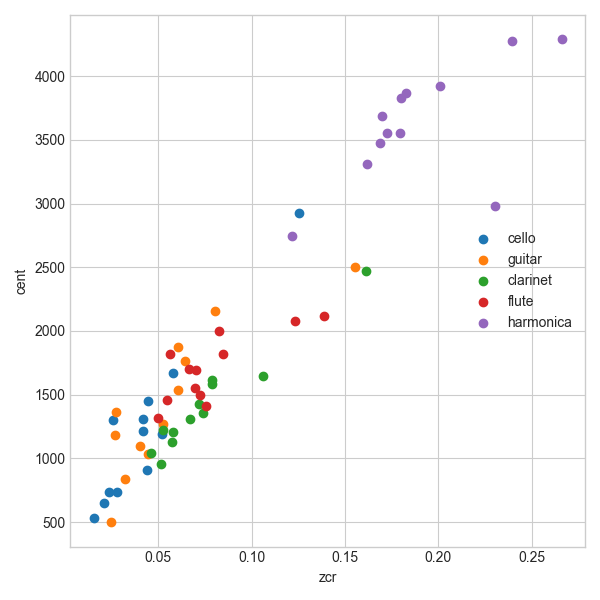

In [7]:
#Plotting the features in a 2D scatter plot
#we can plot up to 2 features (or you can attempt a 3D plot) 
#we also include an histrogram (different view of the same data)

#create a dictionary of features so that we can toggle between indexes and labels for each individual feature
feature_dict = {'zcr':0,
                'cent':1,
                'flat':2}

select1 = 'zcr'
select2 = 'cent'

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    for lab_val, lab_name in zip(range(0,5),classes):
        plt.scatter(features[labels==lab_val, feature_dict[select1]],
                    features[labels==lab_val, feature_dict[select2]],
                    label=lab_name
                    )
    plt.xlabel(select1)
    plt.ylabel(select2)
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()

### 5. Splitting the dataset in training and test set

In [8]:
#Importing the tool, alternatively you can call sklearn.model_selection.train_test_split(..,..,..,)
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.3, random_state=52)


### 6. Scaling features

In [9]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
print('Train set mean and std before scaling',np.mean(feat_train, axis=0),np.std(feat_train, axis=0))
print('Test set mean and std before scaling',np.mean(feat_test, axis=0),np.std(feat_test, axis=0))

feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

print('Train set mean and std after scaling',np.mean(feat_train, axis=0),np.std(feat_train, axis=0))
print('Test set mean and std after scaling',np.mean(feat_test, axis=0),np.std(feat_test, axis=0))


Train set mean and std before scaling [8.98370140e-02 1.93385140e+03 7.41666885e-03] [6.48166969e-02 1.04808770e+03 1.14096339e-02]
Test set mean and std before scaling [8.53829565e-02 1.74657930e+03 6.21467320e-03] [5.01251990e-02 8.71488737e+02 6.07396753e-03]
Train set mean and std after scaling [ 1.77107006e-16  2.11471052e-16 -1.85037171e-17] [1. 1. 1.]
Test set mean and std after scaling [-0.06871775 -0.17867981 -0.10534919] [0.77333776 0.83150364 0.53235429]


### 7. Creating, training and testing the classifier

In [10]:
#creating an instance of a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()

#training the model
model_GNB.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict =  model_GNB.predict(feat_test)

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Number of mislabeled samples 13 out of 18
Accuracy: 0.2777777777777778


### 8. Classification performance metrics

In [11]:
#computing a comprehensive set of performance metrics
print(sklearn.metrics.classification_report(lab_test, lab_predict))

print(sklearn.metrics.confusion_matrix(lab_test, lab_predict))

print("\nKappa score = ", sklearn.metrics.cohen_kappa_score(lab_test, lab_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         4
         3.0       0.75      0.60      0.67         5
         4.0       0.50      1.00      0.67         2

    accuracy                           0.28        18
   macro avg       0.25      0.32      0.27        18
weighted avg       0.26      0.28      0.26        18

[[0 2 1 0 0]
 [2 0 0 1 1]
 [1 2 0 0 1]
 [0 0 2 3 0]
 [0 0 0 0 2]]

Kappa score =  0.09652509652509644


### 9. Backtracing misclassified files

In [12]:
#displaying names of misclassified files
results = lab_test == lab_predict
for index, value in results.items():
    if value == False:
        print(filenames[index],classes[int(lab_test[index])])


70a2e253.wav clarinet
3071420d.wav guitar
49e3587e.wav guitar
b272072e.wav flute
53d1ed2b.wav cello
5de123c3.wav clarinet
75916a91.wav guitar
5689818f.wav cello
76e07b91.wav clarinet
367ad7b1.wav guitar
62ff9fde.wav cello
73ffc53f.wav clarinet
d14f5df1.wav flute


### 10. Confusion matrix visualization

Confusion matrix, without normalization
[[0 2 1 0 0]
 [2 0 0 1 1]
 [1 2 0 0 1]
 [0 0 2 3 0]
 [0 0 0 0 2]]
Normalized confusion matrix
[[0.   0.67 0.33 0.   0.  ]
 [0.5  0.   0.   0.25 0.25]
 [0.25 0.5  0.   0.   0.25]
 [0.   0.   0.4  0.6  0.  ]
 [0.   0.   0.   0.   1.  ]]


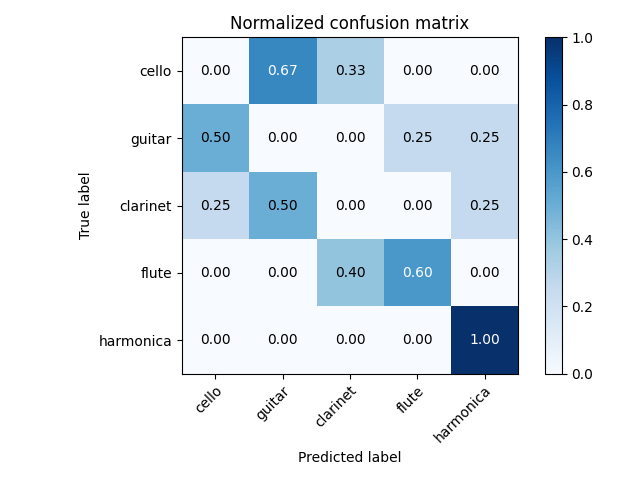

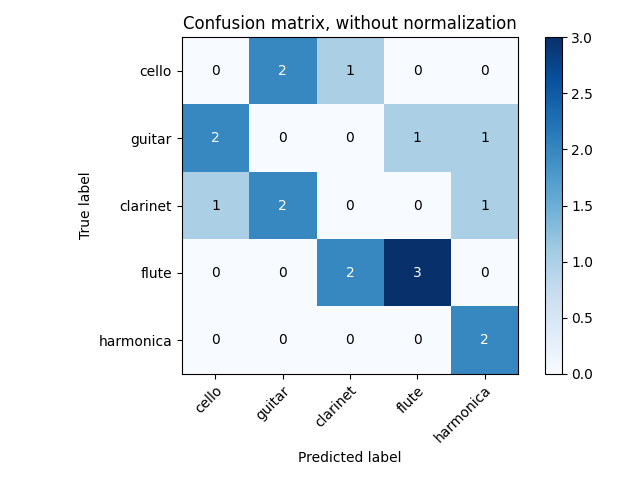

In [13]:
#defining a function for the confusion matrix display 
#(there is no need to understand the code inside this function, just use it)
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#setting the precision to two digits after the decimal point
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### 11. Follow-up activity

1. Use this classifier with MIDI files in folder *examples6* or *examples7*.